**Universidade Federal do Pará**

**Mestrado em Computação Aplicada PPCA/Tucuruí**

**Disciplina: Inteligência Artificial**

Laciene Alves Melo

---


> Objetivo: Normalizar a base de dados churn.csv.

> Descrição: Aplicar técnicas de normalização, limpeza e transformação

In [115]:
# importação da bibliotecas
import pandas as pd

# gráfico
import seaborn as srn

# estatística
import statistics as sts

In [128]:
# carregando a base de dados
dataset = pd.read_csv('../dataset/churn.csv')
dataset

,score,state,gender,age,patrimony,balance,products,credit_card,active,approved_credit
0,619,RS,Feminino,42,2,0,1,1,1,1
1,608,SC,Feminino,41,1,8380786,1,0,1,0
2,502,RS,Feminino,42,8,1596608,3,1,0,1
3,699,RS,Feminino,39,1,0,2,0,0,0
4,850,SC,Feminino,43,2,12551082,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
994,838,SC,Masculino,43,9,12310588,2,1,0,0
995,610,SC,Masculino,29,9,0,3,0,1,0
996,811,SC,Masculino,44,3,0,2,0,1,0
997,587,SC,Masculino,62,7,12128627,1,0,1,0


In [129]:
# agrupar por estado
state = dataset.groupby(['state']).size()
state

state
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [130]:
# aplicando moda
dataset['state'] = dataset['state'].replace(['RP', 'TD'], 'RS')
state = dataset.groupby(['state']).size()
state

state
PR    257
RS    480
SC    258
SP      4
dtype: int64

<Axes: xlabel='state'>

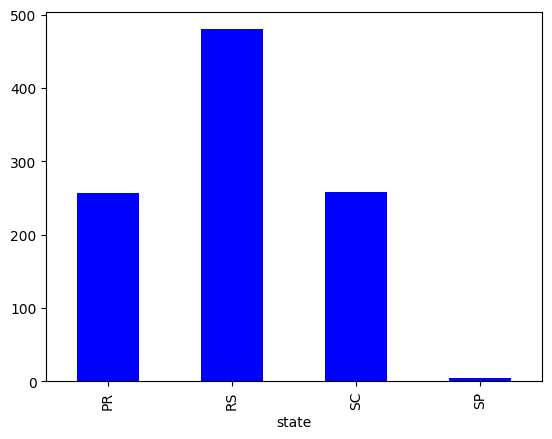

In [131]:
state.plot.bar(color='blue')

In [132]:
# agrupar por gênero
gender = dataset.groupby(['gender']).size()
gender

gender
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [133]:
# transformação de dados, normalizando o gênero feminino
dataset['gender'] = dataset['gender'].replace(['Fem', 'Feminino'], 'F')
gender = dataset.groupby(['gender']).size()
gender

gender
F            464
M              6
Masculino    521
dtype: int64

In [134]:
# transformação de dados, normalizando o gênero masculino
dataset['gender'] = dataset['gender'].replace(['Masculino'], 'M')
gender = dataset.groupby(['gender']).size()
gender

gender
F    464
M    527
dtype: int64

<Axes: >

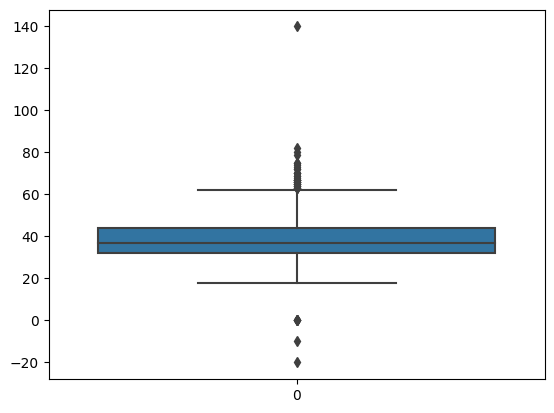

In [135]:
srn.boxplot(dataset['age'])

<Axes: xlabel='age', ylabel='Count'>

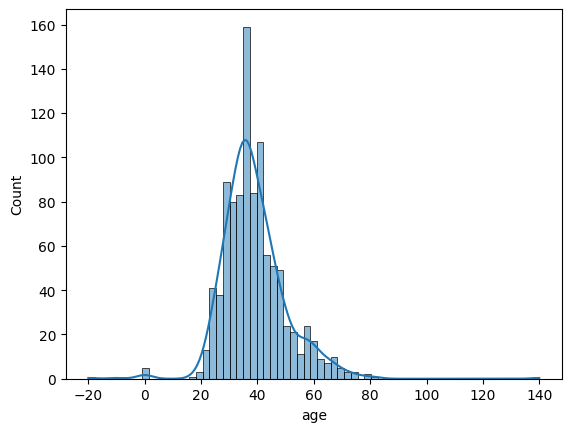

In [136]:
# interpretando idade
srn.histplot(data=dataset['age'], kde=True)


In [137]:
# aplicando a mediana
median = sts.median(dataset['age'])
median

37

<Axes: >

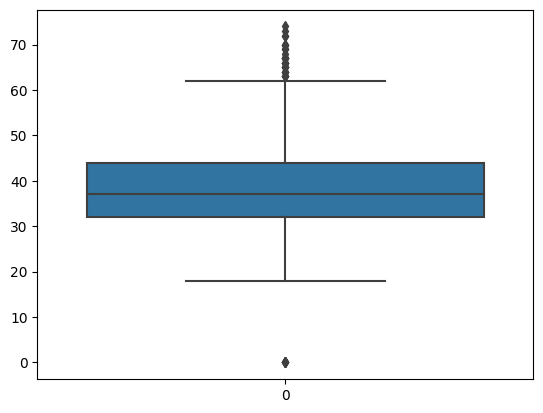

In [138]:
# substituir mediana
dataset.loc[(dataset['age'] < 0) | (dataset['age'] >= 75), 'age']=37
srn.boxplot(dataset['age'])

In [139]:
# Agrupar por patrimônio
patrimony = dataset.groupby(['patrimony']).size()
patrimony

patrimony
0      38
1     104
2     110
3     103
4      87
5     100
6      94
7      95
8     108
9     110
10     50
dtype: int64

In [140]:
# Agrupar por  balanço
balance = dataset.groupby(['balance']).size()
balance

balance
0           350
63227         1
82034         1
93147         1
127209        1
           ... 
19022746      1
19047948      1
19239052      1
20976731      1
21177431      1
Length: 649, dtype: int64

In [142]:
# Agrupar por produtos
products = dataset.groupby(['products']).size()
products

products
1    511
2    452
3     34
4      2
dtype: int64

In [143]:
# Agrupar por cartão de crédito
credit_card = dataset.groupby(['credit_card']).size()
credit_card

credit_card
0    297
1    702
dtype: int64

In [144]:
# Agrupar por cliente ativo
active = dataset.groupby(['active']).size()
active

active
0    490
1    509
dtype: int64

In [146]:
# agrupar por aprovar crédito
approved_credit = dataset.groupby(['approved_credit']).size()
approved_credit

approved_credit
0    796
1    203
dtype: int64

In [147]:
# salvando a base de dados normalizada
dataset.to_csv('../dataset/normalized.csv', index=False)